In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [125]:
train = pd.read_csv("/Users/mayur/Desktop/Datasets/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("/Users/mayur/Desktop/Datasets/store-sales-time-series-forecasting/test.csv")
oil = pd.read_csv("/Users/mayur/Desktop/Datasets/store-sales-time-series-forecasting/oil.csv")
holidays = pd.read_csv("/Users/mayur/Desktop/Datasets/store-sales-time-series-forecasting/holidays_events.csv")
stores = pd.read_csv("/Users/mayur/Desktop/Datasets/store-sales-time-series-forecasting/stores.csv")
transactions = pd.read_csv("/Users/mayur/Desktop/Datasets/store-sales-time-series-forecasting/transactions.csv")
sample_submissions = pd.read_csv("/Users/mayur/Desktop/Datasets/store-sales-time-series-forecasting/sample_submission.csv")
train


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [107]:
stores.describe(include='all')

stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [108]:
train = pd.merge(train, stores, on='store_nbr', how = 'left')

In [127]:

q = train['sales'].quantile(0.99)
train= train[train['sales']<q]
train.describe(include = 'all')

,id,date,store_nbr,family,sales,onpromotion
count,2.970869e+06,2970869,2.970869e+06,2970869,2.970869e+06,2.970869e+06
unique,NaN,1684,NaN,33,NaN,NaN
top,NaN,2013-01-01,NaN,AUTOMOTIVE,NaN,NaN
freq,NaN,1782,NaN,90936,NaN,NaN
mean,1.496539e+06,NaN,2.743428e+01,NaN,2.775347e+02,2.280940e+00
std,8.663818e+05,NaN,1.554417e+01,NaN,7.032099e+02,1.071338e+01
min,0.000000e+00,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,7.457440e+05,NaN,1.400000e+01,NaN,0.000000e+00,0.000000e+00
50%,1.494259e+06,NaN,2.700000e+01,NaN,1.000000e+01,0.000000e+00
75%,2.246700e+06,NaN,4.100000e+01,NaN,1.840000e+02,0.000000e+00


In [128]:

x= train['cluster']
plt.scatter(train["date"], train["sales"])


KeyError: 'cluster'

In [129]:
holidays.describe(include = 'all')
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [130]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [131]:
transactions.describe(include = "all")

,date,store_nbr,transactions
count,83488,83488.000000,83488.000000
unique,1682,NaN,NaN
top,2017-08-15,NaN,NaN
freq,54,NaN,NaN
mean,NaN,26.939237,1694.602158
std,NaN,15.608204,963.286644
min,NaN,1.000000,5.000000
25%,NaN,13.000000,1046.000000
50%,NaN,27.000000,1393.000000
75%,NaN,40.000000,2079.000000


In [132]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [133]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


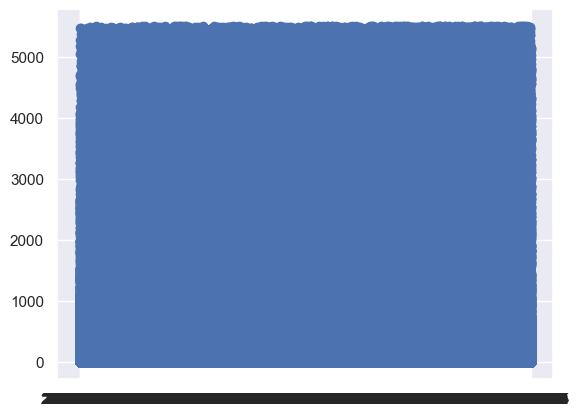

In [136]:
x = train["date"]
y = train["sales"]
x_matrix = x.values.reshape(2970869,1)
y_log = np.log(y)

plt.scatter(x,y)

In [137]:
print(scaler.fit(x_matrix))

ValueError: could not convert string to float: '2013-01-01'

In [138]:
x_scaled = scaler.transform(x_matrix)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [21]:
x_scaled

array([[-0.21301217],
       [-0.21301217],
       [-0.21301217],
       ...,
       [11.89939062],
       [ 0.4417123 ],
       [-0.21301217]])

In [22]:
scaler = StandardScaler()

In [23]:
x.shape

(3000888,)

In [24]:
y.shape


(3000888,)

In [139]:
reg = LinearRegression()
reg.fit(x,y)

ValueError: could not convert string to float: '2013-01-01'

In [26]:
reg.score(x_scaled,y)

0.18311826921668473

In [27]:
reg.coef_

array([471.57031804])

In [28]:
reg.intercept_

357.77574911261894

In [29]:
test_matrix = test["onpromotion"].values.reshape(28512,1)
test_scaled = scaler.transform(test_matrix)
test["sales"]=reg.predict(test_matrix)
test.describe()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
plt.scatter(x_scaled,y)
yhat = reg.coef_ * x_scaled + reg.intercept_
fig = plt.plot(x_scaled,yhat, lw=1, c='orange', label = 'Regression line')
plt.xlabel('onpromotion', fontsize = 20)
plt.ylabel('sales', fontsize = 20)
plt.show()

In [ ]:
reg.score(x_matrix,y)

In [ ]:
from sklearn.feature_selection import f_regression  
f_regression(x_matrix,y)

In [ ]:
reg_summary = pd